In [1]:
from automl import AutoML
from sklearn.datasets import load_boston, load_wine, load_breast_cancer
import os
import numpy as np
import pandas as pd

x = load_breast_cancer(return_X_y=False)
data = np.c_[x.data, x.target]
columns = np.append(x.feature_names, ["target"])
data = pd.DataFrame(data, columns=columns)
X = data.drop('target', axis=1)
Y = data['target']

#X, Y = load_breast_cancer(return_X_y=True)

models = AutoML(X, Y,
                metric="recall",
                ratio=0.25,
                max_iter=3,
                batch_size=1,
                cross_val=True,
                n_splits=3,
                n_jobs=2,
                percentage=100,
                save_plot=None,
                verbose=0)


Algorithm set to binary classification.
Linear Regression can't solve classification problems. Removing model from pipeline.
Models in pipeline: ['LogReg', 'KNN', 'Tree', 'ET', 'RF', 'AdaBoost', 'GBM', 'XGBoost', 'SVM', 'MLP']

Data stats ==================>
Feature shape: (569, 30)
Target shape: (569,)
Size of training set: 426
Size of validation set: 143

Parallel processing with 2 cores.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  1.69s/it]




Final stats ================>>
Target metric: Recall
------------------------------------
Logistic Regression        --> Mean: 0.983   Std: 0.018
K-Nearest Neighbors        --> Mean: 0.980   Std: 0.010
Decision Tree              --> Mean: 0.972   Std: 0.029
Extremely Randomized Trees --> Mean: 0.983   Std: 0.012
Random Forest              --> Mean: 0.972   Std: 0.014
Adaptive Boosting          --> Mean: 0.983   Std: 0.014
Gradient Boosting Machine  --> Mean: 0.964   Std: 0.017
Extreme Gradient Boosting  --> Mean: 0.975   Std: 0.018
Support Vector Machine     --> Mean: 0.961   Std: 0.024
Multilayer Perceptron      --> Mean: 0.966   Std: 0.030


<Figure size 1000x600 with 1 Axes>

In [2]:
models['Tree'].best_params

{'max_depth': 2, 'max_features': 'sqrt'}

In [3]:
models['Tree'].best_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
models['Tree'].Precision()

0.7981651376146789

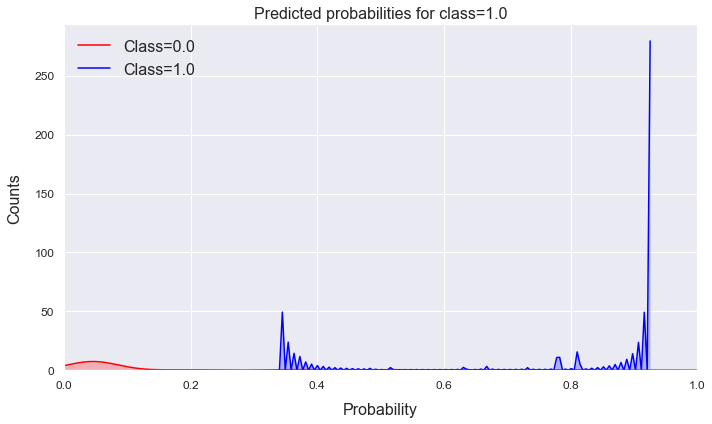

In [5]:
models['Tree'].plot_proba()

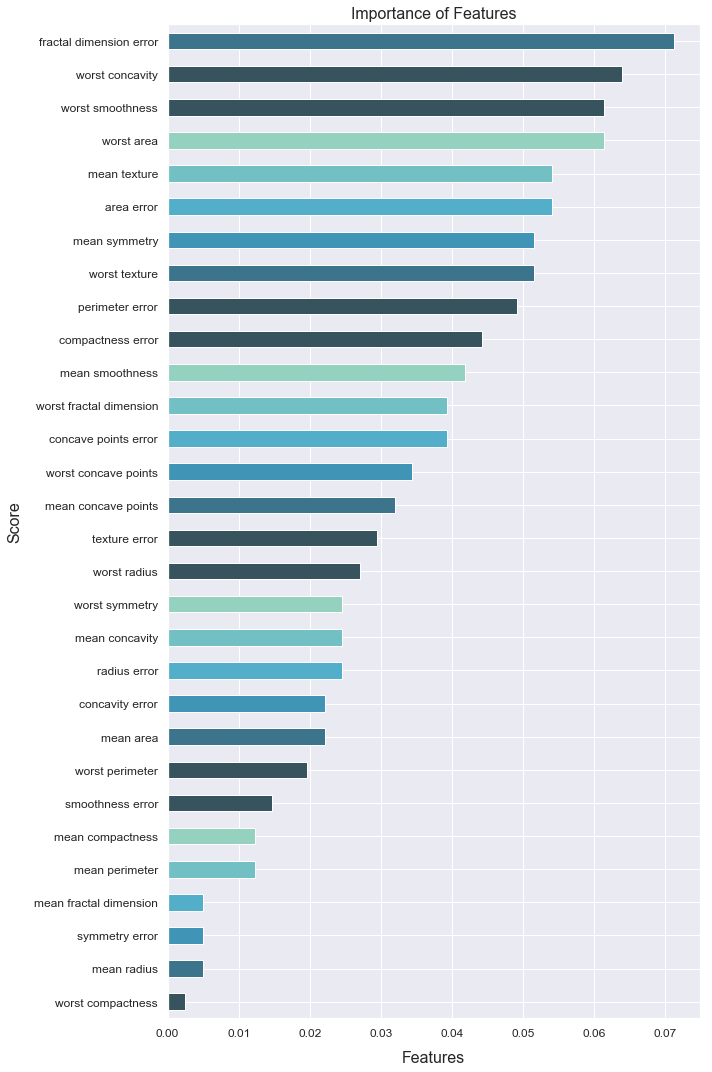

In [6]:
models['AdaBoost'].plot_feature_importance()

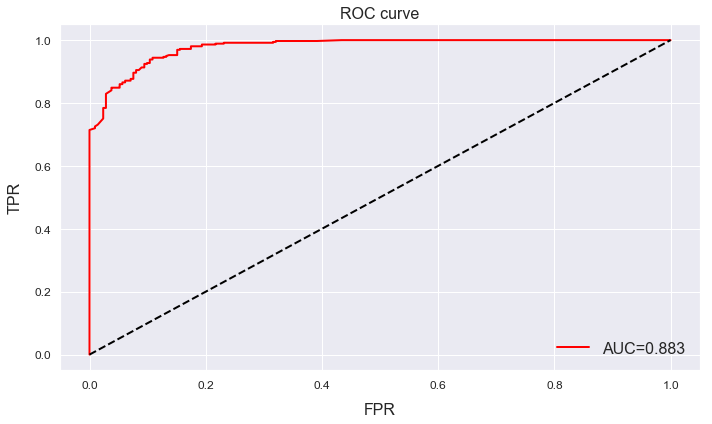

In [7]:
models['KNN'].plot_ROC()

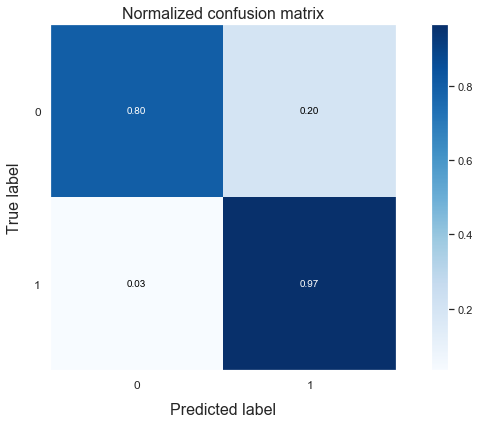

In [14]:
models['KNN'].plot_confusion_matrix()

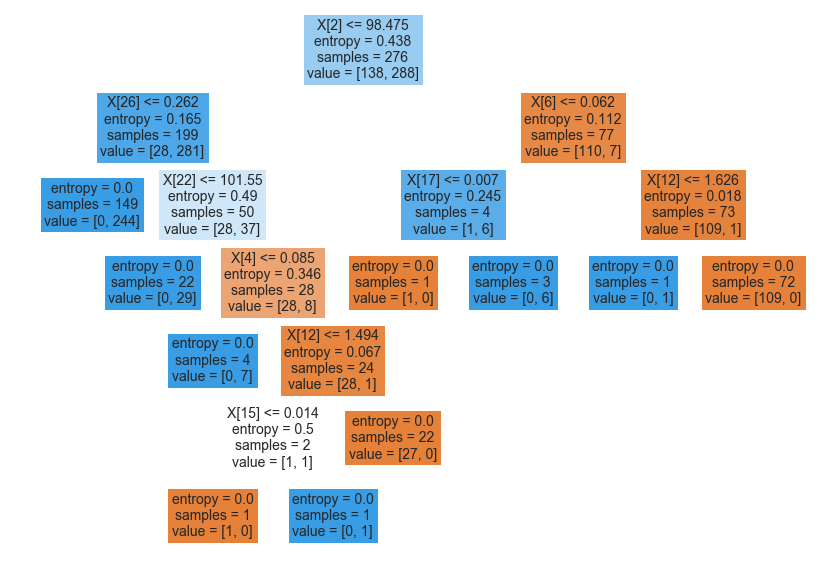

In [11]:
models['RF'].plot_decision_tree(10, rotate=True)